# Data Fetching and Loading

In [1]:
import sys
import os
import matplotlib.image as mp
from shapely.geometry import Polygon
sys.path.append(os.path.abspath(os.path.join('../scripts')))

* Importation

In [2]:
from usgs_lidar import UsgsLidar

In [4]:
US = UsgsLidar()

## Input: Polygon

In [5]:
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

In [6]:
shape, poly = US.fetch_polygon_boundaries(polygon)
print(poly)

POLYGON((-10436887.43333523 5148706.389047224, -10436887.43333523 5149217.145836504, -10435905.484106943 5149217.145836504, -10435905.484106943 5148706.389047224, -10436887.43333523 5148706.389047224))


## Output: Fetch Lidar Data

In [7]:
#default is IOA state
US.fetch_data(polygon)

{'Year: not_specified':         elevation                    geometry
 0          317.84  POINT (-93.74739 41.92107)
 1          318.14  POINT (-93.74737 41.92107)
 2          318.04  POINT (-93.74737 41.92106)
 3          317.90  POINT (-93.74741 41.92107)
 4          317.87  POINT (-93.74749 41.92107)
 ...           ...                         ...
 401572     316.86  POINT (-93.74820 41.91900)
 401573     318.16  POINT (-93.74822 41.91960)
 401574     317.53  POINT (-93.74821 41.92019)
 401575     317.40  POINT (-93.74744 41.92077)
 401576     317.91  POINT (-93.74744 41.92137)
 
 [401577 rows x 2 columns]}

In [7]:
US.fetch_regions(polygon)

['NE_Rainwater-2_2009',
 'SD_James_River_NRCS_J_2010',
 'SD_McCook_County_2012',
 'SD_Spink_County_2012',
 'USGS_LPC_NE_Hat_White_Cherry_UTM14_2016_LAS_2019',
 'USGS_LPC_FL_Lower_Choctawhatchee_2017_LAS_2019',
 'USGS_LPC_NE_NRCS_OrthoLidar_B2_2017_LAS_2019',
 'IA_FullState']

* Let's take another location within the polygon

In [8]:
geo_df = US.fetch_data(polygon, region="NE_Rainwater-2_2009")
geo_df

{'2009.0':         elevation                    geometry
 0          311.35  POINT (-93.75507 41.91802)
 1          311.55  POINT (-93.75502 41.91802)
 2          311.67  POINT (-93.75501 41.91803)
 3          311.70  POINT (-93.75500 41.91803)
 4          311.86  POINT (-93.75498 41.91803)
 ...           ...                         ...
 401572     317.77  POINT (-93.75259 41.91930)
 401573     313.97  POINT (-93.74782 41.91812)
 401574     315.01  POINT (-93.74940 41.91812)
 401575     315.62  POINT (-93.75100 41.91812)
 401576     316.16  POINT (-93.75258 41.91812)
 
 [401577 rows x 2 columns]}

# Terrain Visualisation

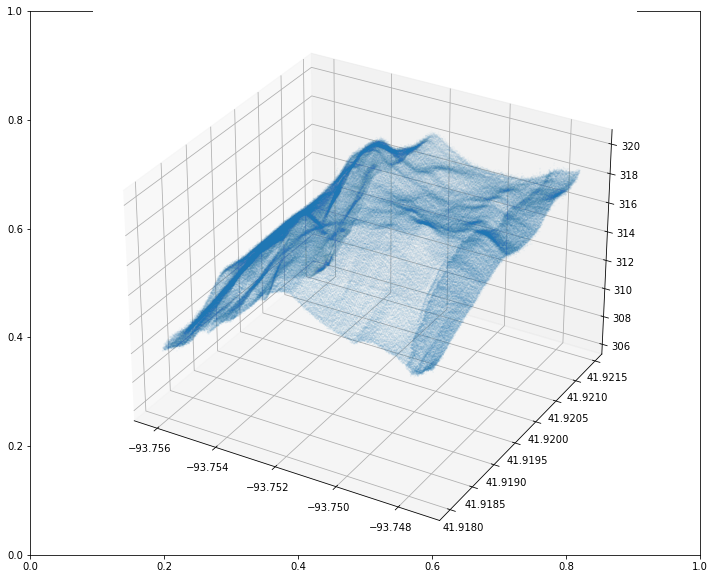

In [9]:
geo_df = geo_df["2009.0"]
US.plot_terrain(geo_df, size=0.001)

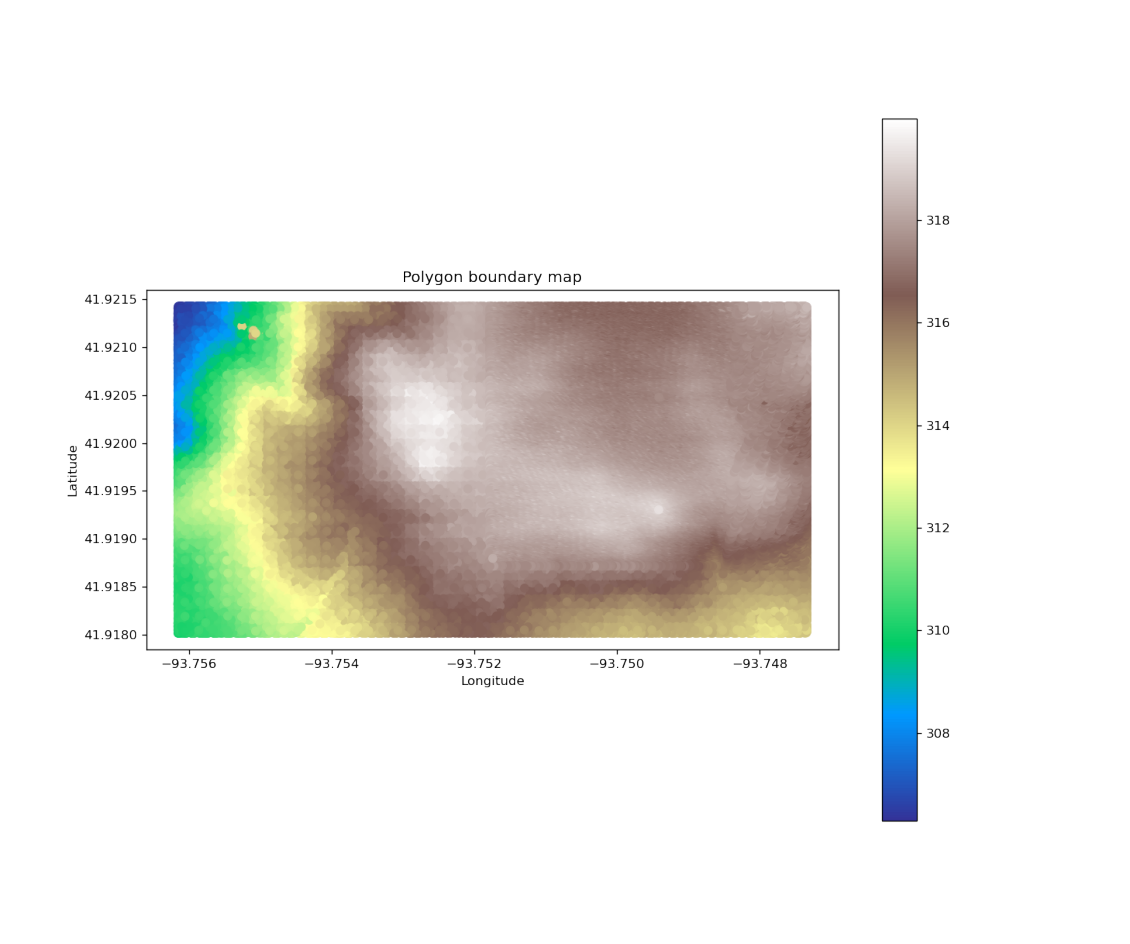

In [10]:
heatmap_path = "../data/heatmap2.png"
US.save_heatmap(geo_df, heatmap_path, "Polygon boundary map")
US.load_heatmap(heatmap_path)